
[*********************100%***********************]  42 of 42 completed

1 Failed download:
- SRS.AX: No data found, symbol may be delisted


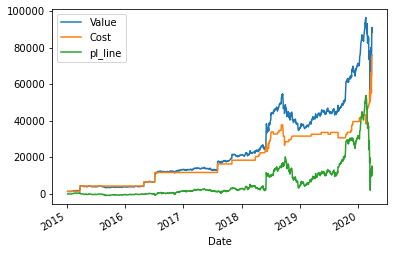

In [1]:
from portfolio.holdings import Portfolio

p = Portfolio()
df = p.holdings
p.plot()

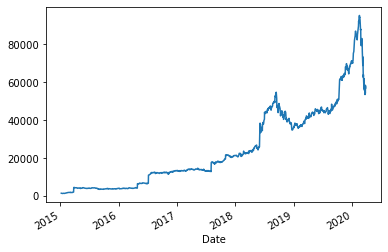

In [2]:
value = df.groupby('Date').sum()['Value']
value = value[value > 0]
value.plot()

In [3]:
from portfolio.commsec import Trades

t = Trades()
trades = t.all
trades

Market    Volume  TradePrice  EffectivePrice  Brokerage
Date       Ticker                                                        
2015-01-07 NAN       ASX    1000.0    1.350000        1.369950       20.0
2015-03-26 WOW       ASX     100.0   28.799999       28.999500       20.0
2016-04-28 RMD       ASX     300.0    7.500000        7.566500       20.0
2016-07-06 QBE       ASX     500.0   10.280000       10.319900       20.0
2017-08-03 NAN       ASX    2000.0    2.310700        2.320675       20.0
...                  ...       ...         ...             ...        ...
2020-01-10 VRS       ASX   -4553.0    0.064000        0.061803       10.0
           WZR       ASX    4448.0    0.225000        0.227248       10.0
2020-01-14 DEM       ASX    4170.0    0.240000        0.242398       10.0
           IFN       ASX   -1767.0    0.680000        0.668710       20.0
2020-01-16 IBXO      ASX  100099.0    0.010000        0.010100       10.0

[66 rows x 5 columns]

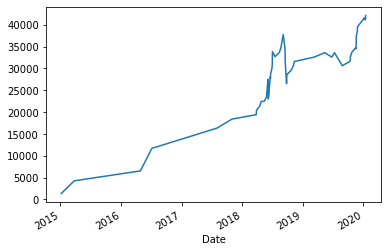

In [4]:
trades = trades.assign(Value = lambda x: x['Volume'] * x['EffectivePrice'])
cost = trades.groupby('Date').sum()['Value'].cumsum()
cost.plot()

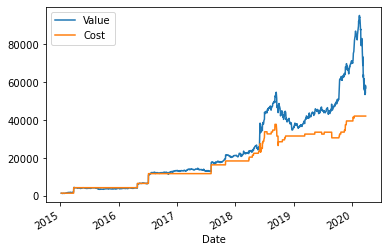

In [18]:
import pandas as pd

plotter = pd.merge_ordered(value,cost, on='Date', fill_method='ffill').set_index('Date')
plotter.columns = ['Value', 'Cost']
plotter.plot()